In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
# We will use a sample dataset MNIST --> This has 28x28 images of handwritten numbers
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

In [3]:
x_train # --> will have 60k entries of matrix with 28x28
y_train # --> output values, here numbers for each matrix

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
%matplotlib inline

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

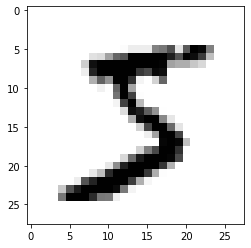

In [6]:
#Displaying the first image from mnist dataset
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
y_train[0]

5

#### as you can see above, the first value in of x_train from image is 5 and y_train first label is also 5.

In [8]:
# We need to normalize the values to be between 0 and 1. so, it will be easier for computation.

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

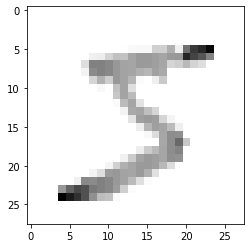

In [10]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

#we can see the image to be blurred due to normalizing

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train[0].shape

(28, 28)

In [13]:
x_train.shape[1:]

(28, 28)

In [14]:
model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

### parameter desc:
#### * 64 - Its the units: Positive integer, dimensionality of the output space - of the nn.
#### * return_seq - True --> bcoz it should pass the info to next layer
* Dropout will release 20% sample and then select another 20% in random order so no overfitting occurs

## Adding further layers and output Dense layer

In [15]:
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

### Compile the model

In [16]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

### Adam - a variant of SGD alog, here learning rate is dynamic and decay is used to vary it

In [17]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [18]:
model.fit(x_train,
          y_train,
          epochs=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.6864 - accuracy: 0.7720 - val_loss: 0.2451 - val_accuracy: 0.9235


* val_loss - loss of cross-validation data
* loss - loss of training data

In [19]:
y_pred = model.predict(x_test)

In [20]:
y_pred

array([[1.6089136e-12, 1.5328254e-06, 7.6168197e-07, ..., 9.9920911e-01,
        1.5277700e-06, 2.5104379e-04],
       [2.4494504e-06, 9.9993986e-04, 9.9678218e-01, ..., 1.4168170e-04,
        3.0530631e-04, 5.2159521e-07],
       [2.6605958e-22, 9.9999988e-01, 1.6822964e-09, ..., 1.2989904e-07,
        5.3185811e-09, 1.6617117e-12],
       ...,
       [1.3307451e-05, 6.0233282e-07, 2.6663781e-06, ..., 2.8581262e-05,
        3.6515100e-06, 2.6105354e-02],
       [5.5505945e-23, 9.8693406e-14, 3.2179898e-18, ..., 1.0768449e-23,
        3.2029080e-14, 1.9498374e-18],
       [1.7636409e-03, 1.1898855e-04, 1.7732050e-04, ..., 3.3356082e-06,
        2.8192741e-04, 6.8624882e-05]], dtype=float32)

TypeError: Invalid shape (10,) for image data

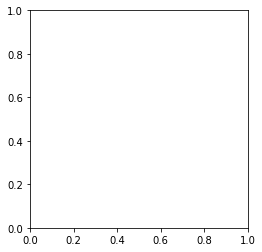

In [21]:
plt.imshow(y_pred[0],cmap=plt.cm.binary)
plt.show()